# Problem 1

We thought that regression can be used to predict what search topics could be trending in the future, classification could be used to classify queries as interrogative (which could lead to a different machine learning model, a la Google), and anomaly detection could be used to deter hackers and unethical spammers.

# Problem 2

We are given a sequence of N iid random variables with the exponential distribution $f_{X}(x) = \lambda e^{-\lambda x}$. We are trying to find the maximum likelihood estimate for $\lambda$. Because the terms of this sequence are independent, we know that the likelihood function must equal the product of their densities:

$$ L(x_1, x_2, ..., x_i, ..., x_N|\lambda) = \prod_{i=1}^{N} f_{X}(x_i|\lambda) $$

We can rewrite this as:

$$ \lambda^{N}exp\bigg(-\lambda \sum_{i=1}^{N}x_i\bigg). $$

Now, we can find the log-likelihood function by taking the natural log of that equation:

$$ ln(L(x_1, x_2, ..., x_i, ..., x_N | \lambda))
= ln(\lambda^{N}exp\bigg(-\lambda \sum_{i=1}^{N}x_i\bigg))\\
= ln(\lambda^{N}) + ln(exp\bigg(-\lambda \sum_{i=1}^{N}x_i\bigg))\\
= Nln(\lambda) - \lambda \sum_{i=1}^{N}x_i $$

We can now maximize the log likelihood by taking the derivative of the above equation and setting it equal to zero to get our maximum likelihood estimate for $\lambda$:

$$ \frac{d}{dx}ln(L(x_1, x_2, ..., x_i, ..., x_N | \lambda)) = 0\\
\frac{d}{dx}(Nln(\lambda) - \lambda \sum_{i=1}^{N}x_i = 0\\
\frac{N}{\lambda} - \sum_{i=1}^{N}x_i = 0\\
\frac{N}{\lambda} = \sum_{i=1}^{N}x_i\\
\lambda = \frac{N}{\sum_{i=1}^{N}x_i} $$

# Problem 3

Suppose X and Y are two random variables whose joint distribution is Normal (Gaussian), centered at
(0,0) and with correlation $\rho$. Consider 2 cases:

i) $\sigma_{x}^{2} = 4; \sigma_{y}^{2} = 9; \rho = 0$

ii) $\sigma_{x}^{2} = 4; \sigma_{y}^{2} = 9; \rho = 0.5$

In [14]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import multivariate_normal

In [15]:
%matplotlib inline

In [16]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
# fig_size[0] = 12
# fig_size[1] = 9
# plt.rcParams["figure.figsize"] = fig_size
# Set save figure dpi to something higher
# Note - this is the one that actually works
# It seems that ipython notebook renders all plots with savefig()
# as opposed to show()
# mpl.rcParams['savefig.dpi']=300 


In [17]:
def plot_contours(u_x, u_y, var_x, var_y, std_x, std_y, rho):
    # Mean vector and Covariance matrix
    mean = [u_x, u_y]
    cov = [(var_x, std_x * std_y * rho),
           (std_x * std_y * rho, var_y)]

    x, y = np.random.multivariate_normal(mean, cov, size=50).T
    ax = sns.kdeplot(x, y)
#     fig1 = plt.figure()
#     ax = fig1.add_subplot(111)
#     ax.plot(x, y)
#     xc = np.arange(-3.0, 3.0, 0.1)
#     yc = np.arange(-3.0, 3.0, 0.1)
#     X, Y = np.meshgrid(xc, yc)

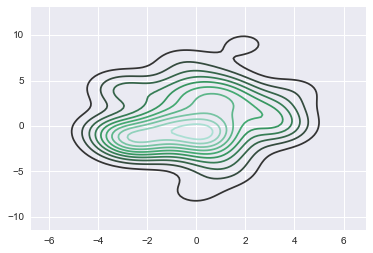

In [18]:
# 3a, part i
u_x = 0
u_y = 0
var_x = 4
var_y = 9
std_x = var_x**(1/2)
std_y = var_y**(1/2)
rho = 0
    
plot_contours(u_x, u_y, var_x, var_y, std_x, std_y, rho)

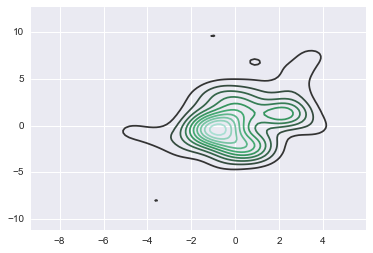

In [19]:
# 3a, part ii
rho = 0.5

plot_contours(u_x, u_y, var_x, var_y, std_x, std_y, rho)

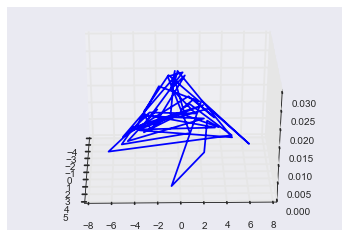

In [20]:
# Problem 3b

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rho = 0
mean = [u_x, u_y]
cov = [(var_x, std_x * std_y * rho),
       (std_x * std_y * rho, var_y)]

X, Y = np.random.multivariate_normal(mean, cov, size=50).T
Z = mpl.mlab.bivariate_normal(X, Y, sigmax=2.0, sigmay=3.0, mux=0.0, muy=0.0, sigmaxy=0.0)

ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()

# Problem 5

In [21]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

# Load the data
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",
                   delim_whitespace=True, header=None,
                   names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio',
                            'b', 'lstat', 'medv'])
print(data.shape)
data = data.dropna()
data.head()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [27]:
# Part A, simple linear regression
regr = linear_model.LinearRegression()
regr.fit(data[['lstat']], data[['medv']])
print('lstat coefficient: {0}'.format(np.squeeze(regr.coef_)))

lstat coefficient: -0.9500493537579906


This coefficient means that as the value of lstat gets larger, the value of medv will get smaller at almost a 1:1 ratio.

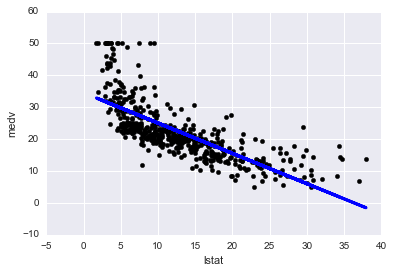

In [30]:
# Part B, plot with regression line
plt.scatter(data[['lstat']], data[['medv']], color='black')
plt.plot(data[['lstat']], regr.predict(data[['lstat']]), color='blue', linewidth=3)
plt.xlabel('lstat')
plt.ylabel('medv')
sns.despine()

There is a negative correlation here. The fit of the line is fairly good. However, there are data points much higher above the regression line on the upper left part of the plot that seem to be pulling the regression line up higher than the congregation of data below that line. But overall, the the regression seems to fit the data well.

In [24]:
# Part C, multiple linear regression
indep_vars = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
dep_vars = ['medv']
indep_data = data[indep_vars]
dep_data = data[dep_vars]
indep_train, indep_test, dep_train, dep_test = train_test_split(indep_data, dep_data, test_size=0.33, random_state=42)

In [25]:
regr = linear_model.LinearRegression()
regr.fit(indep_train, dep_train)
print('Coefficients: {0}'.format(zip(indep_vars,np.squeeze(regr.coef_))))

Coefficients: <zip object at 0x10cc477c8>


In [26]:
regr_predict = regr.predict(indep_test)
print("Residual sum of squares: %.2f"
      % np.mean((regr_predict - dep_test) ** 2))

Residual sum of squares: 20.72


# DISCUSS RESULTS OF PART C HERE

In [32]:
# Part D, MLR on LMEDV
indep_vars = ['crim', 'zn', 'chas', 'rm', 'lstat']
dep_vars = ['medv']
indep_data = data[indep_vars]
dep_data = data[dep_vars]
indep_train, indep_test, dep_train, dep_test = train_test_split(indep_data, dep_data, test_size=0.3084, random_state=42)

In [33]:
regr = linear_model.LinearRegression()
regr.fit(indep_train, dep_train)
print('Coefficients: {0}'.format(zip(indep_vars,np.squeeze(regr.coef_))))

Coefficients: <zip object at 0x10ce80b48>
